**Convergence analysis for timestep for complex forcing**

In [7]:
import sys
sys.path.append("../..")

import matplotlib.pyplot as plt
import numpy as np
from wobble.rb_simple import SimpleRB

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [11]:
time_steps=[1e-3, 1e-2, 1e-1, 10**-.5, 1e-0]
rms_vecs=[]
time_arrays=[]
omega_vecs=[]
for i in range(len(time_steps)):
    time_step=time_steps[i]
    print(time_step)
    num_modes=10
    ma=SimpleRB('test', 3, 
                 mesh_file='../sample_data_files/mesh_files/double_beam.msh',
                 material_file='../sample_data_files/material_files/steel.dat',
                num_modes=num_modes,
                force_path='../sample_data_files/force_files/complex.txt',
                eigenmode_path='../sample_data_files/eigenmode_files/rb_modes.csv',
               timestep=time_step,
               T=10)
    ma.solve()
    ma.get_rotation_angles()
    time_arrays.append(ma.time_array)
    rms_vecs.append(np.sqrt((ma.total_displacement_vectors**2).sum(axis=0)))
    

0.001
0.01
0.1
0.31622776601683794
1.0


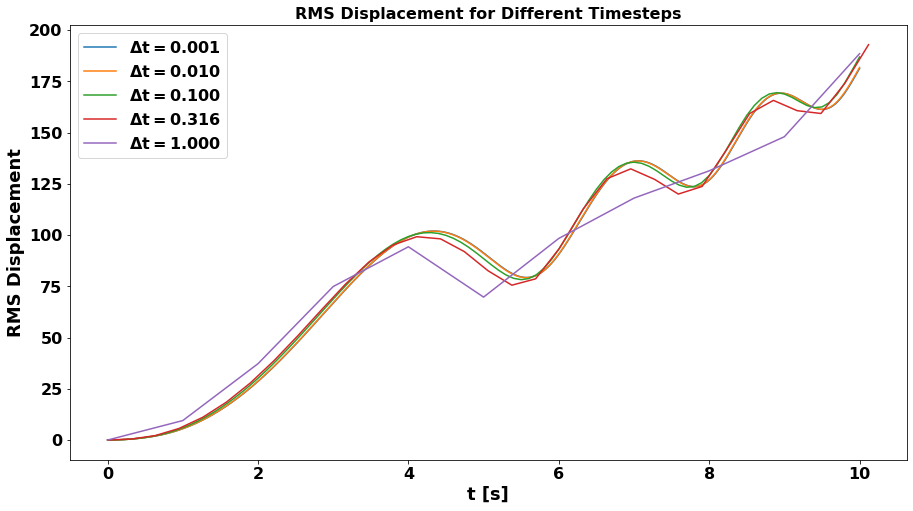

In [18]:
fig,ax=plt.subplots(figsize=(15,8))
for i in range(len(time_steps)):
    ax.plot(time_arrays[i], rms_vecs[i], label=r"$\mathbf{\Delta} \mathbf{t}=$"+'{0:.3f}'.format((time_steps[i])))
ax.set_xlabel("t [s]")
ax.set_xlabel("t [s]")
ax.set_ylabel("RMS Displacement")
ax.set_title("RMS Displacement for Different Timesteps", fontweight='bold')
plt.legend()
#plt.savefig('timestep_funky.png', bbox_inches='tight')
plt.show()